1. Загрузите файл HR.csv в pandas dataframe

1.satisfaction_level​ - Уровень удовлетворенности работой \
2.Last_evaluation ​- Время с момента последней оценки в годах\
3.number_projects​ - Количество проектов, выполненных за время работы\
4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц\
5.time_spend_company​ - Стаж работы в компании в годах\
6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником\
7.left​ - уволился ли сотрудник\
8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет\
9.department ​- отдел в котором работает сотрудник\
10.salary​ - относительный уровень зарплаты

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing

In [23]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [24]:
df.drop(['department', 'salary'], axis=1, inplace=True)

In [28]:
stat_df = df.describe().iloc[[1,2,3,7],:]
stat_df.loc['median'] = df.median()

# рассчитаем моду
df.mode().head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


In [29]:
#оставшиеся статистики
stat_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
median,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000


3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.

In [30]:
df = pd.read_csv('HR.csv')

In [32]:
df = df.iloc[:,0:-2]

In [33]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5
0,-0.362637,-0.46875,-1.0,-0.429907,-0.75,-1.0
1,0.560440,0.56250,0.2,0.551402,0.00,-1.0
2,-0.956044,0.62500,1.0,0.644860,-0.50,-1.0
3,0.384615,0.59375,0.2,0.186916,-0.25,-1.0
4,-0.384615,-0.50000,-1.0,-0.411215,-0.75,-1.0


In [34]:
df_norm.corr(method='pearson')

,0,1,2,3,4,5
0,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697
1,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104
2,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741
3,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143
4,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120
5,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000


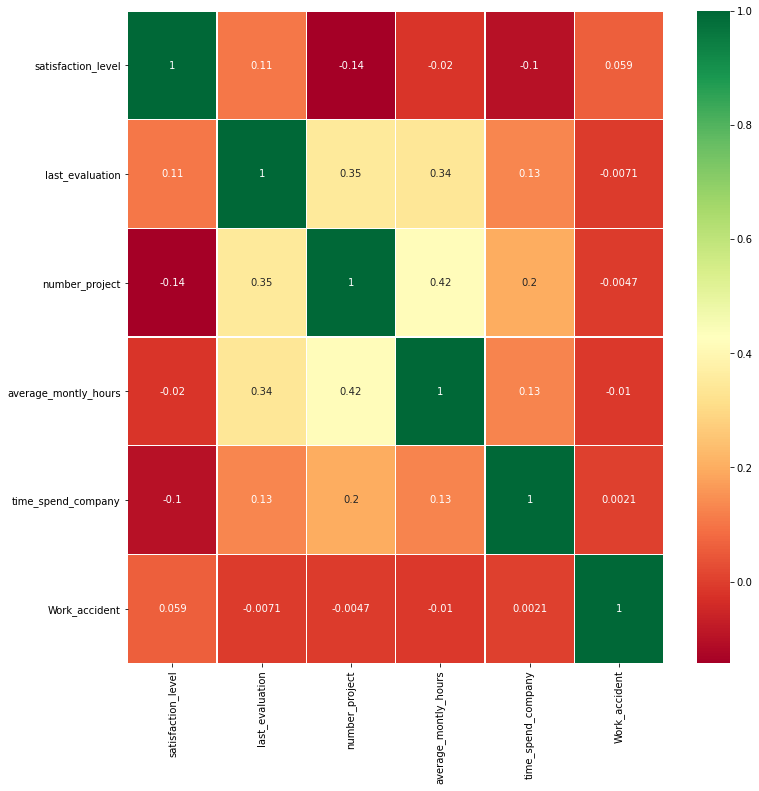

In [36]:
sns.heatmap(df.corr(method='pearson'),annot=True,cmap='RdYlGn',linewidths=0.3) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

1. Наиболее скоррелированные переменные: number_project и average_montly_hours, number_project и last_evalution. Чем больше выполненных проектов, тем больше среднее количество часов на рабочем месте. Чем больше выполненных проектов, тем чаще получают оценки.
2. Наименее скоррелированна переменная work_accident со всеми другими переменными в датасете, т.е. между произошедшими несчастными случаями и другими переменными не видно связи.

4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [38]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [40]:
df_workers = df[df['left'] == 0]
df_workers.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [83]:
depart_names = df_workers.groupby('department')['department'].count().index
size_depart = df_workers.groupby('department')['department'].count()
depart_names_list = list(depart_names)
size_depart_list = list(size_depart)

for i in range(len(depart_names_list)):
    print('В департаменте {} работает - {} чел.'.format(depart_names_list[i], size_depart_list[i]))


В департаменте IT работает - 954 чел.
В департаменте RandD работает - 666 чел.
В департаменте accounting работает - 563 чел.
В департаменте hr работает - 524 чел.
В департаменте management работает - 539 чел.
В департаменте marketing работает - 655 чел.
В департаменте product_mng работает - 704 чел.
В департаменте sales работает - 3126 чел.
В департаменте support работает - 1674 чел.
В департаменте technical работает - 2023 чел.


5. Показать распределение сотрудников по зарплатам.

In [84]:
df_workers = df[df['left'] == 0]

In [85]:
df_workers = df_workers.groupby('salary', as_index=False) \
    .aggregate({'left':'count'}) \
    .sort_values(by='left', ascending=False)

Text(0, 0.5, 'Кол-во сотрудников')

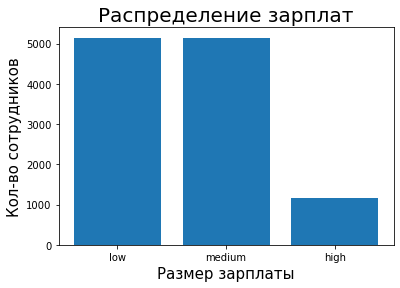

In [87]:
plt.bar(df_workers['salary'], df_workers['left'])
plt.title('Распределение зарплат', fontsize=20)
plt.xlabel('Размер зарплаты', fontsize=15)
plt.ylabel('Кол-во сотрудников', fontsize=15)

В компании больше всего человек с низкой и средней заработной платой.

6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [94]:
df_workers = df[df['left']==0]
df_workers = df_workers.groupby(['department','salary']).aggregate({'left':'count'})

In [102]:
table = pd.pivot_table(df_workers, values='left', index='department', columns='salary', aggfunc=pd.Series.sum ).reset_index()

In [103]:
table.set_index('department', inplace=True)

In [104]:
table

salary,high,low,medium
department,,,
IT,79,437,438
RandD,47,309,310
accounting,69,259,235
hr,39,243,242
management,224,121,194
marketing,71,276,308
product_mng,62,346,296
sales,255,1402,1469
support,133,757,784


Text(0.5, 0, 'Число сотрудников')

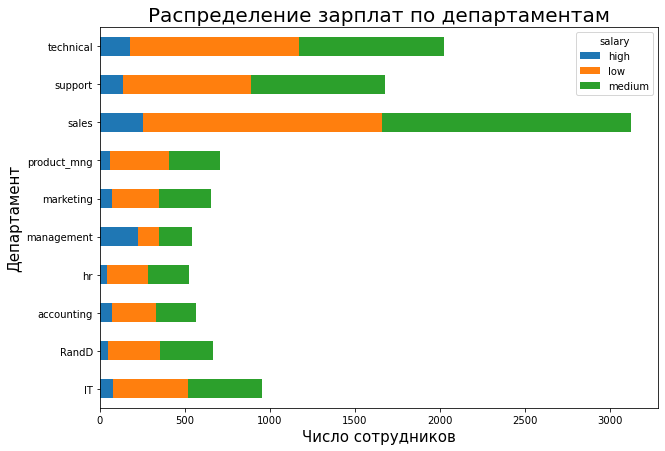

In [105]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

table.plot.barh(stacked=True)
plt.title('Распределение зарплат по департаментам', fontsize=20)
plt.ylabel('Департамент', fontsize=15)
plt.xlabel('Число сотрудников', fontsize=15)

7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

H0 - Сотрудники с высоким окладом проводят на работе столько же или больше времени, чем сотрудники с низким окладом

H1 - Сотрудники с высоким окладом проводят на работе меньше времени, чем сотрудники с низким окладом¶

In [131]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

In [132]:
df = pd.read_csv('HR.csv')

In [139]:
df_low = list(df[df['salary'] == 'low']['average_montly_hours'])
df_high = list(df[df['salary'] == 'high']['average_montly_hours'])

F, p = f_oneway(df_low, df_high)  # дисперсионный анализ (ДА) в python

alpha = 0.05   # Уровень значимости
print(F, p)  # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

0.5312486194509748 0.46610234782779036
Одинаковое распределение (не отвергаем H0)


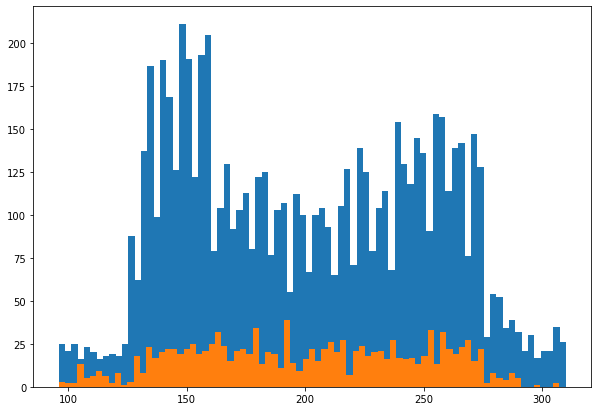

In [140]:
plt.hist(df_low, bins=80); #Выборка A
plt.hist(df_high, bins=80);  #Выборка B

8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):\
    ●Доля сотрудников с повышением за последние 5 лет\
    ●Средняя степень удовлетворенности\
    ●Среднее количество проектов

Сначала рассчитаем показатели для уволившихся сотрудников

In [161]:
df_workers_1 = df[df['left'] == 1]

count_1 = df_workers_1[df_workers_1['promotion_last_5years'] == 1]['promotion_last_5years'].count() / df_workers_1['promotion_last_5years'].count()
print (f'Доля сотрудников с повышением за последние 5 лет = {round(count_1*100, 2)}%')

satisfaction_1 = df_workers_1['satisfaction_level'].mean()
print (f'Средняя степень удовлеторенности = {round(satisfaction_1, 2)}.')

project_1 = df_workers_1['number_project'].mean()
print (f'Среднее количество проектов = {round(project_1, 2)} шт.')

Доля сотрудников с повышением за последние 5 лет = 0.53%
Средняя степень удовлеторенности = 0.44.
Среднее количество проектов = 3.86 шт.


Рассчитаем показатели среди не уволившихся сотрудников

In [164]:
df_workers_0 = df[df['left'] == 0]

count_0 = df_workers_0[df_workers_0['promotion_last_5years'] == 1]['promotion_last_5years'].count() / df_workers_0['promotion_last_5years'].count()
print (f'Доля сотрудников с повышением за последние 5 лет = {round(count_0 * 100, 2)}%')

satisfaction_0 = df_workers_0['satisfaction_level'].mean()
print (f'Средняя степень удовлеторенности = {round(satisfaction_0, 2)}.')

project_0 = df_workers_0['number_project'].mean()
print (f'Среднее количество проектов = {round(project_0, 2)} шт.')

Доля сотрудников с повышением за последние 5 лет = 2.63%
Средняя степень удовлеторенности = 0.67.
Среднее количество проектов = 3.79 шт.


9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).\
Оценить качество модели на тестовой выборки

In [217]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [230]:
data = df[['time_spend_company', 'average_montly_hours']]
data_left = list(df['left'])

In [231]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_left, test_size=0.25)

In [232]:
lda = LinearDiscriminantAnalysis()

In [233]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [234]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [235]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
3745,0,0
3746,0,0
3747,0,0
3748,1,0


In [236]:

# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [237]:
accuracy_score(y_test, lda.predict(X_test))

0.7501333333333333

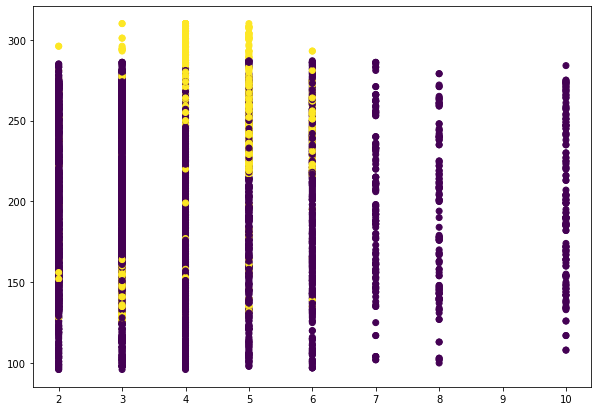

In [238]:
# визуализируем дискриминантную линию
plt.scatter(X_train['time_spend_company'], X_train['average_montly_hours'], c=y_train)
plt.show()

In [239]:
from matplotlib import colors

In [240]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

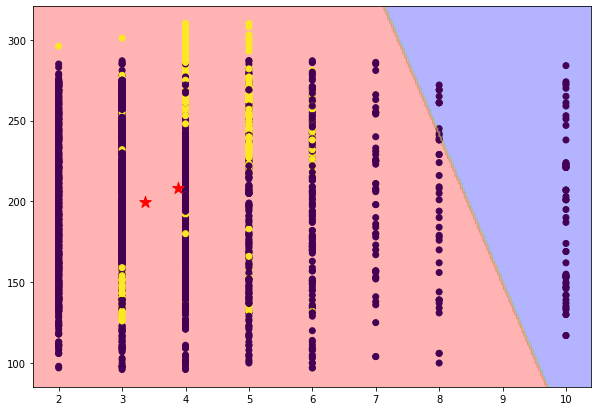

In [241]:
# сам scatter plot
plt.scatter(X_test['time_spend_company'], X_test['average_montly_hours'], c=y_test)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 300, 300
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.2)